<a href="https://colab.research.google.com/github/RebelReindeer/Coding-Projects/blob/main/neuralnetworkstudies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import random

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images/255, test_images/255

class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 6s 0us/step


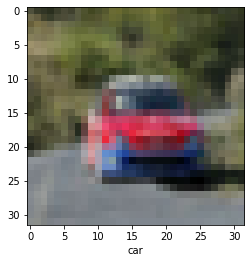

In [ ]:
img_index = 6969

plt.imshow(train_images[img_index], cmap = plt.cm.binary)
plt.xlabel(class_names[train_labels[img_index][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten(input_shape = (2, 2, 128)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation = 'sigmoid'))
model.add(layers.Dense(128, activation = 'sigmoid'))
model.add(layers.Dense(10, activation = 'softmax'))


model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       147584    
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 128)         1

In [ ]:
model.fit(train_images, train_labels, epochs = 15, validation_data=(test_images, test_labels))

Epoch 1/15
 555/1563 [=========>....................] - ETA: 5:18 - loss: 1.5892 - accuracy: 0.4217

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)